# Python para el análisis de datos -  UNAV 2020-2021
---
# Proyecto Final - Miguel Pérez Villena

Comienza el proceso buscando a través de una descarga directa de Pandas, el listado de Divisas que contravaloran con el EURO, para graficar los siguientes pasos. Del listado presentado necesitará seleccionar una para poder graficar.

In [ ]:
#!pip install krakenex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for krakenex: filename=krakenex-2.1.0-py3-none-any.whl size=22515 sha256=3af042e82121ca1dc9c9e2d4e362a19519c736d6fce5cfd0b2fba098dc08fbd6
  Stored in directory: /root/.cache/pip/wheels/ff/81/24/87f129363e0c0d57de8ce01c69b8a4e29e6e46e1ebec4bfaad
Successfully built krakenex


In [ ]:
#Bloque de importación de librerías y funciones

import krakenex
import time
import pandas as pd
from datetime import datetime
import numpy as np


In [ ]:
#declaración de funciones
def valida_fecha(tipo_fecha, fecha):
    no_valida=True

    while no_valida:
            try:
                fecha = input("Ingresa una fecha de {} en el formato YYYY-MM-DD: ".format(tipo_fecha))
                valid_date=datetime.strptime(fecha, '%Y-%m-%d')
                valid_date = int(time.mktime(valid_date.timetuple()))
                print("Fecha {} válida".format(tipo_fecha))
                no_valida=False
            except ValueError:
                print("Fecha {} inválida. Inserte una fecha con el formato indicado".format(fecha))

    return fecha

def valida_par_divisas(lista_divisas):
    no_valida=True
    while no_valida:
        try:
            par_divisa=input("Indique uno de los pares indicados en la lista anterior. Ej: XXBTZEUR")
            if par_divisa in lista_divisas:
                no_valida=False
            else:
                raise ValueError('')

        except ValueError:
            print('Par de divisas{} no encontrada en la lista, busque una nueva. Ej: XXBTZEUR'.format(par_divisa))
            
    return par_divisa

            
def valida_periodo_media():
    no_valida=True

    while no_valida:
            try:
                media = input("Ingrese in valor entero que indique el número de días para el que aplicar la media móvil")
                media_int=int(media)                
                print("Valor válido".format(media_int))
                if(media_int>=7 & media_int<=14):
                    no_valida=False
                else:
                    raise ValueError('')

            except ValueError:
                print("Valor {} inválido. Inserte un valor entero entre 7 y 14".format(media))

    return media_int

# Create VWAP function
def vwap(df):
    v = df['volume'].values
    tp = (df['Low'] + df['Close'] + df['High']).div(3).values
    return df.assign(vwap=(tp * v).cumsum() / v.cumsum())

def macd(df):
    k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
    # Get the 12-day EMA of the closing price
    d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
    # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
    macd = k - d
    # Get the 9-Day EMA of the MACD for the Trigger line
    macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
    # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
    macd_h = macd - macd_s
    # Add all of our new values for the MACD to the dataframe
    df['macd'] = df.index.map(macd)
    df['macd_h'] = df.index.map(macd_h)
    df['macd_s'] = df.index.map(macd_s)
    return df





In [ ]:
import requests
resp = requests.get('https://api.kraken.com/0/public/AssetPairs')
resp = resp.json()
euro_pairs = []
for pair in resp['result']:
    if pair.endswith('EUR'):
        euro_pairs.append(pair)
euro_pairs

['1INCHEUR',
 'AAVEEUR',
 'ACAEUR',
 'ACHEUR',
 'ADAEUR',
 'ADXEUR',
 'AGLDEUR',
 'AIREUR',
 'AKTEUR',
 'ALCXEUR',
 'ALGOEUR',
 'ALICEEUR',
 'ALPHAEUR',
 'ANKREUR',
 'ANTEUR',
 'APEEUR',
 'API3EUR',
 'APTEUR',
 'ARPAEUR',
 'ASTREUR',
 'ATLASEUR',
 'ATOMEUR',
 'AUDIOEUR',
 'AVAXEUR',
 'AXSEUR',
 'BADGEREUR',
 'BALEUR',
 'BANDEUR',
 'BATEUR',
 'BCHEUR',
 'BICOEUR',
 'BITEUR',
 'BLZEUR',
 'BNCEUR',
 'BNTEUR',
 'BOBAEUR',
 'BONDEUR',
 'BSXEUR',
 'BTTEUR',
 'C98EUR',
 'CELREUR',
 'CFGEUR',
 'CHREUR',
 'CHZEUR',
 'COMPEUR',
 'COTIEUR',
 'CQTEUR',
 'CRVEUR',
 'CSMEUR',
 'CTSIEUR',
 'CVCEUR',
 'CVXEUR',
 'DAIEUR',
 'DASHEUR',
 'DENTEUR',
 'DOTEUR',
 'DYDXEUR',
 'EGLDEUR',
 'ENJEUR',
 'ENSEUR',
 'EOSEUR',
 'ETHWEUR',
 'EWTEUR',
 'FARMEUR',
 'FETEUR',
 'FIDAEUR',
 'FILEUR',
 'FISEUR',
 'FLOWEUR',
 'FORTHEUR',
 'FTMEUR',
 'FXSEUR',
 'GALAEUR',
 'GALEUR',
 'GARIEUR',
 'GHSTEUR',
 'GLMREUR',
 'GMTEUR',
 'GNOEUR',
 'GRTEUR',
 'GSTEUR',
 'GTCEUR',
 'HFTEUR',
 'ICPEUR',
 'ICXEUR',
 'IDEXEUR',
 'IMXEUR

In [ ]:
#declaración de API krakenez
k = krakenex.API()


In [ ]:
#Bloque de iteracción con usuario para insertar par de divisas a trabajar, fecha de inicio/fin y periodo de ajuste
#para hacer la media
#Se indican los Valores por defecto para las variables con las que se puede interactuar: periodo de ajuste, fecha de inicio, 
#fecha fin y par de divisas a graficar. En caso de querer utilizar las funciones antes comentadas de interacción de usuario sería necesario descomentar las líneas correspondientes.


start = '28/01/2016'
#start=valida_fecha('inicio',start)
stop = '03/02/2017'
#stop=valida_fecha('fin',stop)
par_divisas='XXBTZEUR'
#par_divisas= valida_par_divisas(euro_pairs)

periodo_de_ajuste=30
#periodo_ajuste=valida_periodo_media()



Se realiza una petición a través de la librería de Krakenex indicando par de divisas, tipo de petición (OHLC: Open, High, Low, Close), fecha de inicio e intervalo en minutos(por defecto a 1440 que se corresponde con un día, para que de información de fin de día del par de divisas desde la fecha de inicio)
Se identifica tras la recogida de datos aquellos valores numéricos y categóricos, así como un parseo para el tipo fecha, ya que viene en formato unixtime y es necesario transformarlo a date para trabajar graficados entendibles.
Suavizado de variables clasificadas como numéricas para hacer la media móvil de n días indicados por usuario (por defecto 7)
Métrica de RSI junto con suavizado de la valoración
se crean trabajan valores de gain y loss para poder aplicar la fórmula de rsi.
Una vez calculados todos los valores necesarios para graficar tanto cotización, suavizado como rsi, se plantea visualizaar con matplotlib,  con dos gráfica apiladas esta representación, de tal forma que se pueda observar valores de rsi en el tiempo y el comportamiento del cierre de marcado de la divisa.



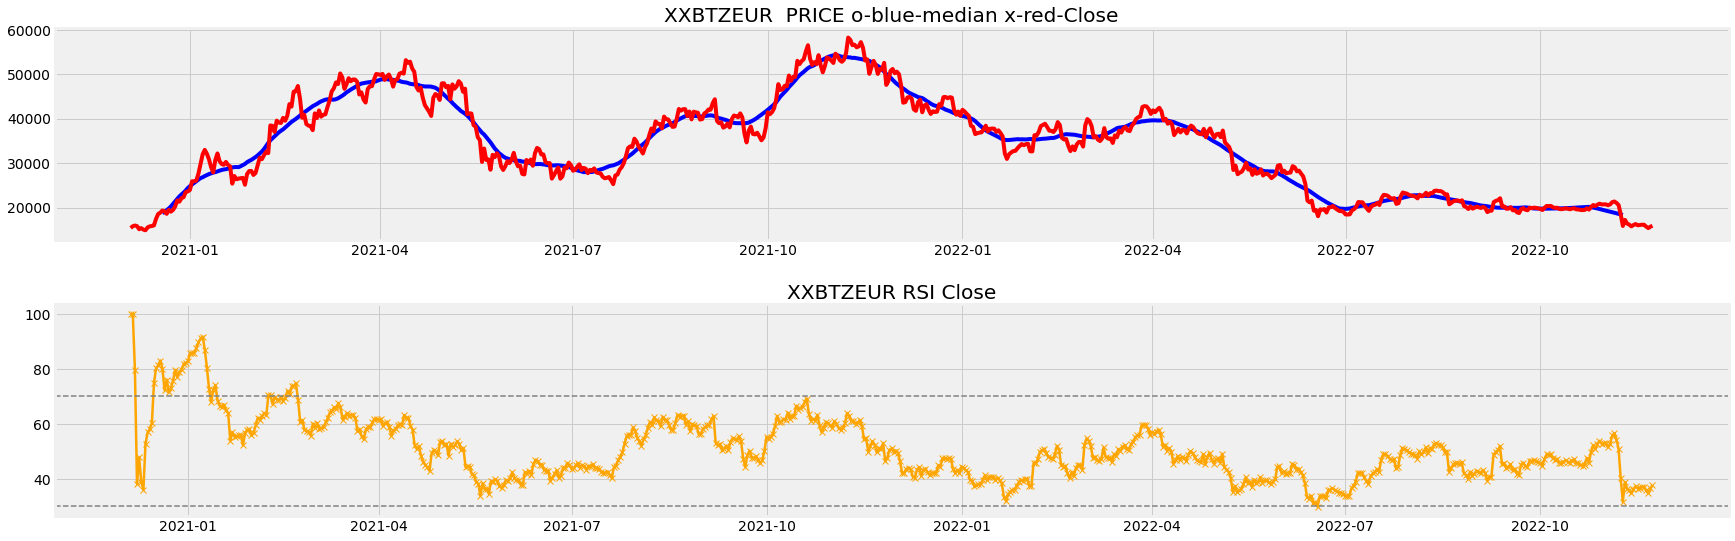

In [ ]:
import matplotlib.pyplot as plt
data = k.query_public('OHLC', {'pair':par_divisas, 'interval':1440, 'since':start})
df = pd.DataFrame( data['result'][par_divisas]) 
df.columns = ['unixtimestap', 'Open', 'High', 'Low', 'Close', 'vwap', 'volume', 'count']
#df['unixtimestap'] = pd.to_datetime(df['unixtimestap'], unit='s')
#df.set_index('unixtimestap', inplace=True)
df['Open'] = df['Open'].astype('float')
df['High'] = df['High'].astype('float')
df['Low'] = df['Low'].astype('float')
df['Close'] = df['Close'].astype('float')
df['volume'] = df['volume'].astype('float')
df['date'] = pd.to_datetime(df['unixtimestap'],unit='s')
numeric_variables= ['Open', 'High', 'Low', 'Close','volume']
pd_7d = df[numeric_variables].rolling(periodo_de_ajuste, center=True).mean()

df['close_delta'] = df['Close'].diff()
df['gain'] = df['close_delta'].clip(lower=0)
df['loss'] = -1 * df['close_delta'].clip(upper=0)


df['ema_up'] = df['gain'].ewm(com=periodo_de_ajuste -1, adjust=True).mean()
df['ema_down'] = df['loss'].ewm(com=periodo_de_ajuste -1, adjust=True).mean()
df['rs'] = df['ema_up']/df['ema_down']
df['rsi'] = 100-(100/(1+df['rs']))


plt.figure(figsize=(30, 10))
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

ax1.set_title(par_divisas+'  PRICE o-blue-median x-red-Close')
ax1.plot(df.date, pd_7d.Close,'b', label ='Median Close')
ax1.plot(df.date, df.Close,'r', label ='Close')
ax2.set_title(par_divisas+' RSI Close')
ax2.plot(df.date, df.rsi,'x-', label ='RSI',color='orange',linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')


plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# df['macd'] = df.index.map(macd)
# df['macd_h'] = df.index.map(macd_h)
# df['macd_s'] = df.index.map(macd_s)

macd(df)



fig = make_subplots(rows=2, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=df.date,
        y=pd_7d["Close"],
        line=dict(color='#6599FF', width=4),
        name='Median_close',
        # showlegend=False,
        legendgroup='1',
        
    ), row=1, col=1
)

# fig.append_trace(
#     go.Scatter(
#         x=df.date,
#         y=df["rsi"],
#         line=dict(color='#097054', width=4),
#         name='rsi',
#         # showlegend=False,
#         legendgroup='1',
#     ), row=1, col=1
# )

# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=df.date,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
   increasing_line_color= 'cyan', decreasing_line_color= 'blue',
        showlegend=False), row=1, col=1)
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=df.date,
        y=df['macd'],
        line=dict(color='#ff9900', width=2),
        name='macd',
        # showlegend=False,
        legendgroup='2',
    ), row=2, col=1
)
# señal lenta (%d)
fig.append_trace(
    go.Scatter(
        x=df.date,
        y=df['macd_s'],
        line=dict(color='#000000', width=2),
        # showlegend=False,
        legendgroup='2',
        name='señal'
    ), row=2, col=1
)
# Colorize the histogram values
colors = np.where(df['macd_h'] < 0, '#000', '#F50F12')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=df.date,
        y=df['macd_h'],
        name='histogram',
        marker_color=colors,
    ), row=2, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.show()

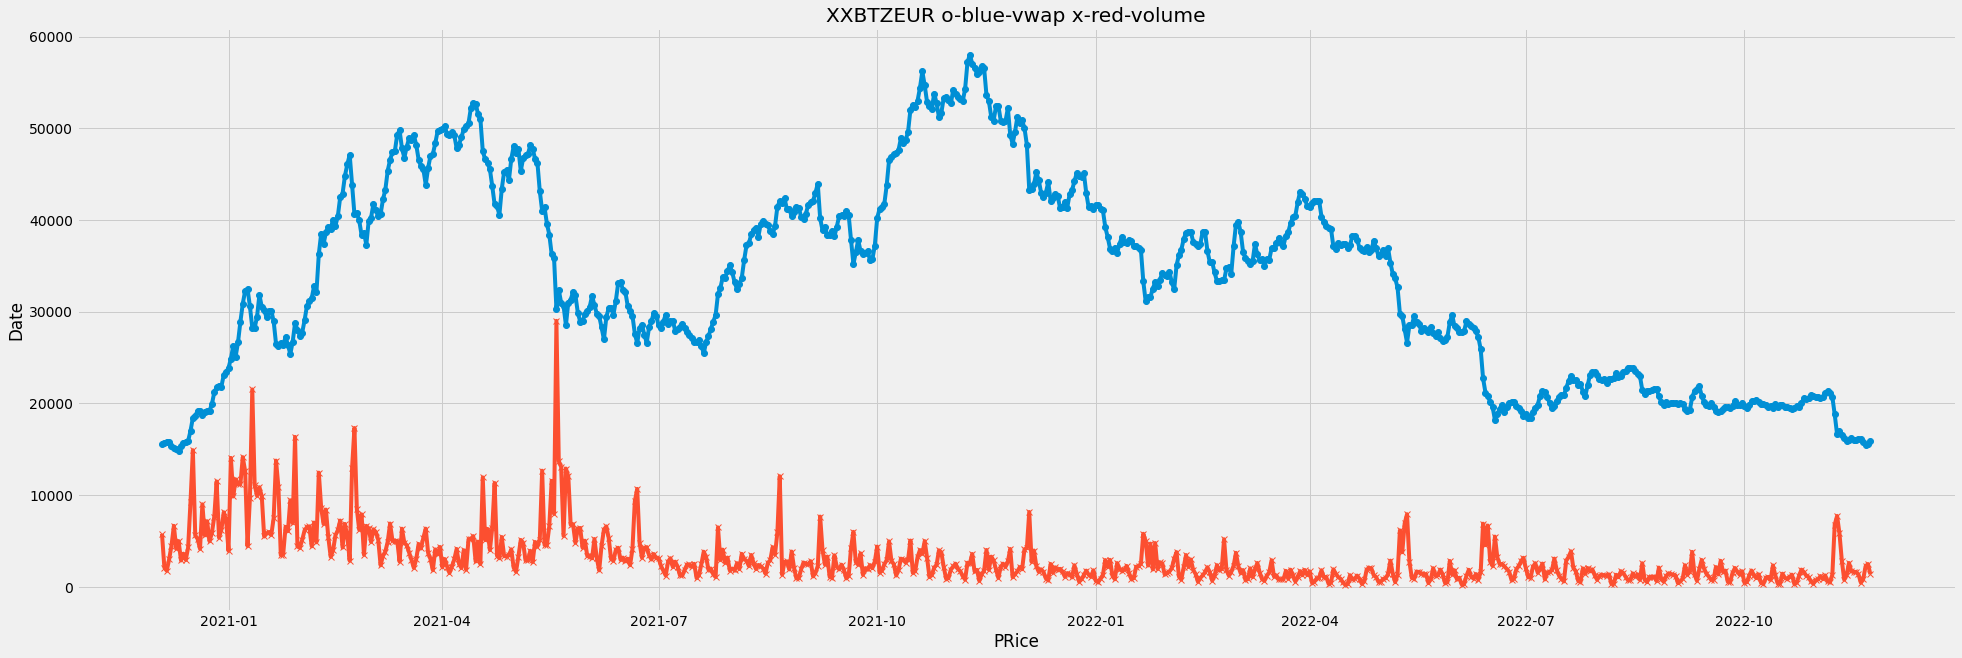

In [ ]:
#creación de valor de vwap
df = df.groupby(df.date, group_keys=False).apply(vwap)

plt.figure(figsize=(30, 10))
plt.title(par_divisas+' o-blue-vwap x-red-volume')
plt.xlabel("PRice")
plt.ylabel("Date")
plt.plot(df.date,df.vwap,'o-', label='vwap')
plt.plot(df.date, df.volume,'x-', label ='volume')

plt.show()